In [1]:
import wikipedia
import requests
from bs4 import BeautifulSoup
import warnings

%matplotlib inline

warnings.simplefilter(action='ignore', category=UserWarning)

# Scraping

In [2]:
origin = '/wiki/Jaguar_(disambiguation)'

In [3]:
neighbors = {}

In [4]:
def find_inner_links(page_link):
    soup = BeautifulSoup(requests.get('https://en.wikipedia.org'+page_link).text)
    links = []
    l = soup.find_all('li')
    for i in l:
        tmp = i.find_all('a')
        for ii in tmp:
            try:
                if '/wiki/' == ii['href'][0:6]:
                    links.append(ii['href'])
            except KeyError:
                pass
    return links

In [5]:
first_nodes = set(find_inner_links(origin))
neighbors[origin] = first_nodes

In [6]:
second_nodes = set()
for link in first_nodes:
    tmp = find_inner_links(link)
    neighbors[link] = tmp
    second_nodes = second_nodes.union(set(tmp))

In [7]:
nodes = first_nodes.union(second_nodes)
nodes.add(origin)

In [8]:
counter = 0
for link in second_nodes:
    counter += 1
    if counter % 100 == 0:
        print('{}/{}'.format(counter, len(second_nodes)))
    tmp = find_inner_links(link)
    neighbors[link] = list(set(tmp).intersection(nodes))

100/8745
200/8745
300/8745
400/8745
500/8745
600/8745
700/8745
800/8745
900/8745
1000/8745
1100/8745
1200/8745
1300/8745
1400/8745
1500/8745
1600/8745
1700/8745
1800/8745
1900/8745
2000/8745
2100/8745
2200/8745
2300/8745
2400/8745
2500/8745
2600/8745
2700/8745
2800/8745
2900/8745
3000/8745
3100/8745
3200/8745
3300/8745
3400/8745
3500/8745
3600/8745
3700/8745
3800/8745
3900/8745
4000/8745
4100/8745
4200/8745
4300/8745
4400/8745
4500/8745
4600/8745
4700/8745
4800/8745
4900/8745
5000/8745
5100/8745
5200/8745
5300/8745
5400/8745
5500/8745
5600/8745
5700/8745
5800/8745
5900/8745
6000/8745
6100/8745
6200/8745
6300/8745
6400/8745
6500/8745
6600/8745
6700/8745
6800/8745
6900/8745
7000/8745
7100/8745
7200/8745
7300/8745
7400/8745
7500/8745
7600/8745
7700/8745
7800/8745
7900/8745
8000/8745
8100/8745
8200/8745
8300/8745
8400/8745
8500/8745
8600/8745
8700/8745


In [11]:
s = 0
for i in neighbors.keys():
    s += len(neighbors[i])

In [12]:
print('Total number of nodes : {}'.format(len(nodes)))
print('Number of first nodes : {}'.format(len(first_nodes)))
print('Number of second nodes : {}'.format(len(second_nodes)))
print('Number of edges : {}'.format(s))

Total number of nodes : 8745
Number of first nodes : 73
Number of second nodes : 8745
Number of edges : 859184


# Network creation

In [2]:
import networkx as nx
import matplotlib.pyplot as plt

## Saving

In [3]:
import pickle

def save_obj(obj, name ):
    with open('data/'+ name + '.pkl', 'wb') as f:
        pickle.dump(obj, f, pickle.HIGHEST_PROTOCOL)

def load_obj(name ):
    with open('data/' + name + '.pkl', 'rb') as f:
        return pickle.load(f)

In [ ]:
save_obj(nodes, 'nodes')
save_obj(first_nodes, 'first_nodes')
save_obj(second_nodes, 'second_nodes')
save_obj(neighbors, 'neighbors')

## Loading

In [4]:
nodes = load_obj('nodes')
first_nodes = load_obj('first_nodes')
second_nodes = load_obj('second_nodes')
neighbors = load_obj('neighbors')

In [5]:
nodes = list(nodes)
nodes[0]

'/wiki/African_civet'

In [6]:
#directed :
#g = nx.DiGraph(neighbors)

#undirected :
g = nx.Graph(neighbors)

In [7]:
adj = nx.adjacency_matrix(g)
adj

<8745x8745 sparse matrix of type '<class 'numpy.int32'>'
	with 1166629 stored elements in Compressed Sparse Row format>

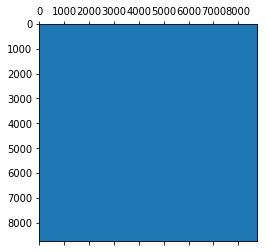

In [10]:
plt.spy(adj)

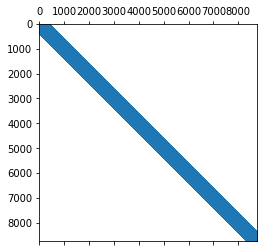

In [11]:
plt.spy(nx.laplacian_matrix(g), precision=1)

Check if it's symmetric :

In [12]:
(adj != adj.T)

<8745x8745 sparse matrix of type '<class 'numpy.bool_'>'
	with 0 stored elements in Compressed Sparse Row format>

In [13]:
edges = g.edges(nodes[0])
edges = list(edges)

In [14]:
len(edges)

84

In [15]:
real_edges = neighbors[nodes[0]]
real_edges

['/wiki/Category:All_articles_needing_additional_references',
 '/wiki/AMD_K5',
 '/wiki/Athlon_64',
 '/wiki/Steamroller_(microarchitecture)',
 '/wiki/Portal:Contents',
 '/wiki/List_of_AMD_Sempron_microprocessors',
 '/wiki/Special:Random',
 '/wiki/List_of_AMD_Athlon_XP_microprocessors',
 '/wiki/Ryzen',
 '/wiki/Excavator_(microarchitecture)',
 '/wiki/AMD_10h',
 '/wiki/Athlon_II',
 '/wiki/AMD_K12',
 '/wiki/Geode_(processor)',
 '/wiki/Zen_2',
 '/wiki/Template_talk:AMD_processors',
 '/wiki/AMD_Phenom',
 '/wiki/List_of_AMD_Phenom_microprocessors',
 '/wiki/Phenom_II',
 '/wiki/Special:MyTalk',
 '/wiki/Athlon_X4',
 '/wiki/List_of_AMD_chipsets',
 '/wiki/Category:Advanced_Micro_Devices_sockets',
 '/wiki/Portal:Featured_content',
 '/wiki/List_of_AMD_Opteron_microprocessors',
 '/wiki/AMD_FX',
 '/wiki/AMD_K6-2',
 '/wiki/Am286',
 '/wiki/Puma_(microarchitecture)',
 '/wiki/MIPS_architecture#MIPS32',
 '/wiki/Opteron#Opteron_X_.2828_nm_bulk.29_-_Jaguar_microarchitecture',
 '/wiki/Athlon',
 '/wiki/Special:

In [16]:
len(real_edges)

81

## Visualization

In [8]:
import numpy as np

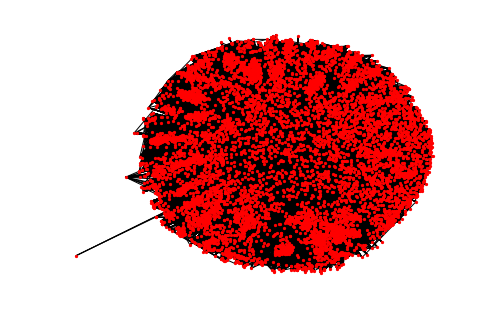

In [18]:
nx.draw(g, node_size=5)

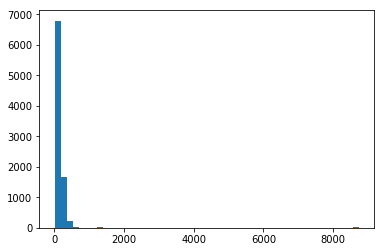

In [19]:
degrees = adj.sum(axis=1)

plt.hist(degrees, bins=50);

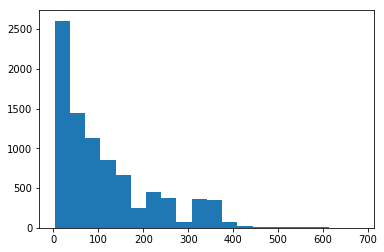

In [20]:
degrees_truncated = np.array(degrees)

degrees_truncated = degrees_truncated[degrees_truncated < 700]

plt.hist(degrees_truncated, bins=20);

## Laplacian

In [16]:
from scipy import sparse

In [10]:
laplacian = sparse.csr_matrix(nx.laplacian_matrix(g), dtype=float)

In [12]:
laplacian

<8745x8745 sparse matrix of type '<class 'numpy.int32'>'
	with 1167149 stored elements in Compressed Sparse Row format>

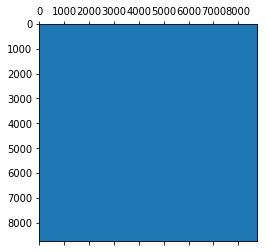

In [24]:
plt.spy(laplacian)

In [17]:
eigenvalues, eigenvectors = sparse.linalg.eigsh(laplacian, k=10, which='SM')

In [18]:
eigenvalues

array([  1.03839707e-12,   3.00000000e+00,   1.39999402e+01,
         1.40000000e+01,   1.40000000e+01,   1.40000000e+01,
         1.40000000e+01,   1.40000000e+01,   1.40000000e+01,
         1.42151949e+01])

In [19]:
eigenvectors

array([[  1.06935054e-02,   1.14396843e-04,  -8.27513569e-04, ...,
          3.59568141e-14,   5.34122844e-14,  -7.46036774e-04],
       [  1.06935054e-02,   1.14396843e-04,  -8.20237444e-04, ...,
          4.39504132e-14,   5.56045362e-14,  -4.24866827e-03],
       [  1.06935054e-02,   1.14396843e-04,  -8.29073376e-04, ...,
          3.17803840e-14,   5.68213044e-14,   2.38689643e-03],
       ..., 
       [  1.06935054e-02,   1.14396843e-04,  -8.28969347e-04, ...,
          3.13926849e-14,   5.53770117e-14,   2.51518408e-03],
       [  1.06935054e-02,   1.14396843e-04,  -8.28006231e-04, ...,
          3.14766854e-14,   5.81111966e-14,   2.43801340e-03],
       [  1.06935054e-02,   1.14396843e-04,  -7.82271235e-04, ...,
          8.30658547e-14,   2.30105581e-13,  -5.91894026e-02]])

In [22]:
np.linalg.matrix_rank(laplacian)

C:\Users\Quentin\Anaconda3\lib\site-packages\scipy\sparse\compressed.py:214: SparseEfficiencyWarning: Comparing a sparse matrix with 0 using == is inefficient, try using != instead.
  ", try using != instead.", SparseEfficiencyWarning)


1

In [20]:
dense = laplacian.todense()

In [21]:
dense

matrix([[ 125.,   -1.,   -1., ...,    0.,    0.,    0.],
        [  -1.,   23.,    0., ...,    0.,    0.,    0.],
        [  -1.,    0.,  426., ...,    0.,    0.,    0.],
        ..., 
        [   0.,    0.,    0., ...,   17.,    0.,    0.],
        [   0.,    0.,    0., ...,    0.,   87.,    0.],
        [   0.,    0.,    0., ...,    0.,    0.,   15.]])

In [49]:
dense[:, 3]

matrix([[-1.],
        [-1.],
        [-1.],
        ..., 
        [-1.],
        [-1.],
        [-1.]])

In [48]:
dense[:, 4]

matrix([[-1.],
        [ 0.],
        [ 0.],
        ..., 
        [ 0.],
        [ 0.],
        [ 0.]])

In [47]:
dense[:, 5]

matrix([[-1.],
        [-1.],
        [-1.],
        ..., 
        [-1.],
        [-1.],
        [-1.]])

In [46]:
dense[:, 6]

matrix([[-1.],
        [ 0.],
        [ 0.],
        ..., 
        [ 0.],
        [ 0.],
        [ 0.]])

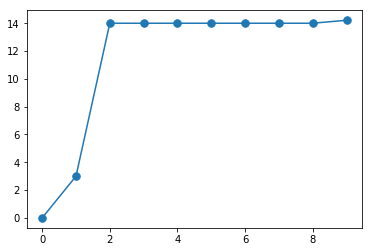

In [42]:
plt.plot(eigenvalues, '.-', markersize=15);